In [56]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Set default font size to match LaTeX document
plt.rcParams.update({
    'font.size': 10,       # Default text size
    'axes.titlesize': 10,  # Title size
    'axes.labelsize': 10,  # Axis label size
    'xtick.labelsize': 8, # X-tick label size
    'ytick.labelsize': 8, # Y-tick label size
    'legend.fontsize': 8, # Legend font size
    'figure.titlesize': 12 # Figure title size
})

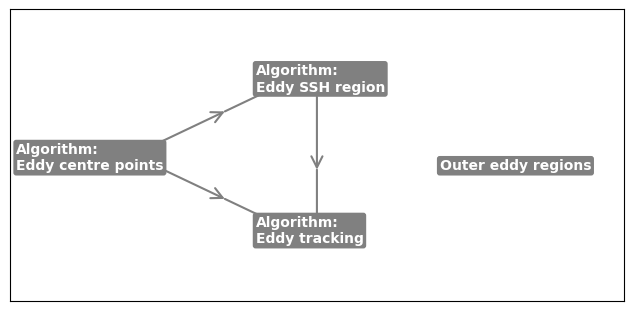

In [57]:
fig, ax = plt.subplots(
    figsize=(6.2217,3),layout='constrained',facecolor='none', edgecolor='none'
)

# Fjern x-ticks
ax.set_xticks([])

# Fjern y-ticks
ax.set_yticks([])


text_location = [0.01,0.45]
text_location_arr = [0.2,0.5]
arrow_location = [0.5,0.8]
arrow_location2 = [0.5, 0.2]

ax.annotate(f'Algorithm:\nEddy centre points', 
    xy=text_location, 
    fontsize=10, 
    weight='bold', 
    color='white',
    bbox=dict(facecolor='grey', edgecolor='none', boxstyle='round,pad=0.2'),
    xycoords='axes fraction'
)

midpoint = [(text_location_arr[0] + arrow_location2[0]) / 2, (text_location_arr[1] + arrow_location2[1]) / 2]

# Første del av pilen
arrow1 = FancyArrowPatch(
    posA=text_location_arr,
    posB=midpoint,
    arrowstyle='->',
    mutation_scale=20,
    color='grey',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)

# Andre del av pilen med pilhodet
arrow2 = FancyArrowPatch(
    posA=midpoint,
    posB=arrow_location2,
    arrowstyle='-',
    mutation_scale=20,
    color='grey',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)

# Legg til pilene på aksen
ax.add_patch(arrow1)
ax.add_patch(arrow2)

midpoint = [(text_location_arr[0] + arrow_location[0]) / 2, (text_location_arr[1] + arrow_location[1]) / 2]

# Første del av pilen
arrow1 = FancyArrowPatch(
    posA=text_location_arr,
    posB=midpoint,
    arrowstyle='->',
    mutation_scale=20,
    color='grey',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)

# Andre del av pilen med pilhodet
arrow2 = FancyArrowPatch(
    posA=midpoint,
    posB=arrow_location,
    arrowstyle='-',
    mutation_scale=20,
    color='grey',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)

# Legg til pilene på aksen
ax.add_patch(arrow1)
ax.add_patch(arrow2)

ax.annotate(f'Algorithm:\nEddy SSH region', 
    xy=[arrow_location[0]-0.1,arrow_location[1]-0.08], 
    fontsize=10, 
    weight='bold', 
    color='white',
    bbox=dict(facecolor='grey', edgecolor='none', boxstyle='round,pad=0.2'),
    xycoords='axes fraction'
)

ax.annotate(f'Algorithm:\nEddy tracking', 
    xy=[arrow_location2[0]-0.1,arrow_location2[1]], 
    fontsize=10, 
    weight='bold', 
    color='white',
    bbox=dict(facecolor='grey', edgecolor='none', boxstyle='round,pad=0.2'),
    xycoords='axes fraction'
)

text_location = [arrow_location[0],arrow_location[1]-0.1]
text_location_arr = [arrow_location[0],arrow_location[1]-0.1]
arrow_location = arrow_location2[0],arrow_location2[1]


midpoint = [(text_location_arr[0] + arrow_location[0]) / 2, (text_location_arr[1] + arrow_location[1]) / 2]

# Første del av pilen
arrow1 = FancyArrowPatch(
    posA=text_location_arr,
    posB=midpoint,
    arrowstyle='->',
    mutation_scale=20,
    color='grey',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)

# Andre del av pilen med pilhodet
arrow2 = FancyArrowPatch(
    posA=midpoint,
    posB=arrow_location,
    arrowstyle='-',
    mutation_scale=20,
    color='grey',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)

ax.add_patch(arrow1)
ax.add_patch(arrow2)

text_location = [0.7,0.45]

ax.annotate(f'Outer eddy regions', 
    xy=text_location, 
    fontsize=10, 
    weight='bold', 
    color='white',
    bbox=dict(facecolor='grey', edgecolor='none', boxstyle='round,pad=0.2'),
    xycoords='axes fraction'
)

# Save the figure
fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyAlgoStructure',dpi=300, facecolor='none', edgecolor='none',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

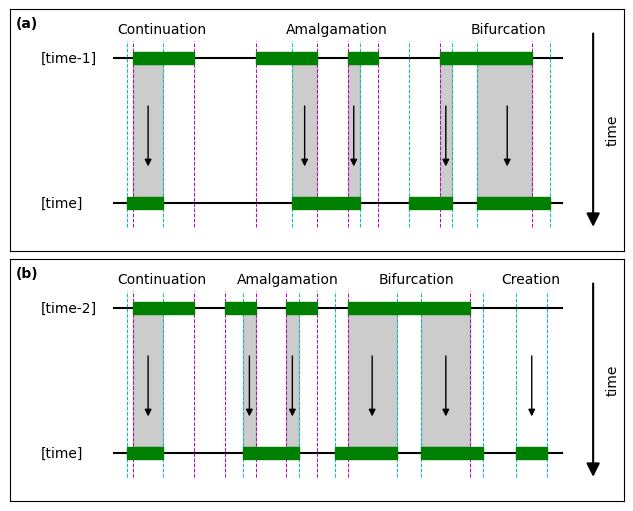

In [ ]:
fig, (ax,ax2) = plt.subplots(2,1,sharex=True,sharey=True,
    figsize=(6.2217,5),layout = 'constrained',facecolor='none', edgecolor='none'
)

# Fjern x-ticks
ax.set_xticks([])

# Fjern y-ticks
ax.set_yticks([])
ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.annotate('(a)',[0.01,0.925],fontweight='bold')
ax2.annotate('(b)',[0.01,0.925],fontweight='bold')

# Horizontal lines
ax.plot([0.17,0.9],[0.8,0.8], color='k',zorder=0)
ax.plot([0.17,0.9],[0.2,0.2], color='k',zorder=0)
#Vertical
arrow = FancyArrowPatch(
    posA=[0.95,0.9],
    posB=[0.95,0.1],
    arrowstyle='-|>',
    mutation_scale=20,
    color='k',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)
ax.add_patch(arrow)
ax.annotate('time',[0.97,0.45],rotation=90)


ax.annotate('time',[0.05,0.18],rotation=0)
ax.annotate('time-1',[0.05,0.78],rotation=0)

ax.annotate('Continuation',[0.175,0.9])
ax.annotate('Amalgamation',[0.45,0.9])
ax.annotate('Bifurcation',[0.75,0.9])

# add eddy SSH area Continuation
ax.fill([0.2,0.3,0.3,0.2],[0.825,0.825,0.775,0.775],zorder=2,color='g')
ax.plot([0.2,0.2],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)
ax.plot([0.3,0.3],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)

ax.fill([0.2,0.25,0.25,0.2],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax.fill([0.19,0.25,0.25,0.19],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax.plot([0.19,0.19],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax.plot([0.25,0.25],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

arrow = FancyArrowPatch(
    posA=[0.225,0.6],
    posB=[0.225,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax.add_patch(arrow)


# add eddy SSH area Amalgamation
ax.fill([0.4,0.5,0.5,0.4],[0.825,0.825,0.775,0.775],zorder=2,color='g')
ax.plot([0.4,0.4],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)
ax.plot([0.5,0.5],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)

ax.fill([0.46,0.5,0.5,0.46],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax.fill([0.55,0.6,0.6,0.55],[0.825,0.825,0.775,0.775],zorder=2,color='g')
ax.plot([0.55,0.55],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)
ax.plot([0.6,0.6],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)

ax.fill([0.55,0.57,0.57,0.55],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax.fill([0.46,0.57,0.57,0.46],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax.plot([0.46,0.46],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax.plot([0.57,0.57],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

arrow = FancyArrowPatch(
    posA=[0.48,0.6],
    posB=[0.48,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax.add_patch(arrow)
arrow = FancyArrowPatch(
    posA=[0.56,0.6],
    posB=[0.56,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax.add_patch(arrow)

# add eddy SSH area Bifurcation
ax.fill([0.7,0.85,0.85,0.7],[0.825,0.825,0.775,0.775],zorder=2,color='g')
ax.plot([0.7,0.7],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)
ax.plot([0.85,0.85],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)

ax.fill([0.7,0.72,0.72,0.7],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax.fill([0.65,0.72,0.72,0.65],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax.plot([0.65,0.65],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax.plot([0.72,0.72],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

ax.fill([0.76,0.85,0.85,0.76],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax.fill([0.76,0.88,0.88,0.76],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax.plot([0.76,0.76],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax.plot([0.88,0.88],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

arrow = FancyArrowPatch(
    posA=[0.81,0.6],
    posB=[0.81,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax.add_patch(arrow)
arrow = FancyArrowPatch(
    posA=[0.71,0.6],
    posB=[0.71,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax.add_patch(arrow)

# ax2
# Horizontal lines
ax2.plot([0.17,0.9],[0.8,0.8], color='k',zorder=0)
ax2.plot([0.17,0.9],[0.2,0.2], color='k',zorder=0)
#Vertical
arrow = FancyArrowPatch(
    posA=[0.95,0.9],
    posB=[0.95,0.1],
    arrowstyle='-|>',
    mutation_scale=20,
    color='k',
    lw=1.5,
    shrinkA=0,
    shrinkB=0
)
ax2.add_patch(arrow)
ax2.annotate('time',[0.97,0.45],rotation=90)
#ax.plot([0.95,0.95],[0.1,0.9], color='k')

ax2.annotate('time',[0.05,0.18],rotation=0)
ax2.annotate('time-2',[0.05,0.78],rotation=0)

ax2.annotate('Continuation',[0.175,0.9])
ax2.annotate('Amalgamation',[0.37,0.9])
ax2.annotate('Bifurcation',[0.6,0.9])
ax2.annotate('Creation',[0.8,0.9])

# add eddy SSH area Continuation
ax2.fill([0.2,0.3,0.3,0.2],[0.825,0.825,0.775,0.775],zorder=2,color='g')
ax2.plot([0.2,0.2],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.3,0.3],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)

ax2.fill([0.2,0.25,0.25,0.2],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax2.fill([0.19,0.25,0.25,0.19],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax2.plot([0.19,0.19],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.25,0.25],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

arrow = FancyArrowPatch(
    posA=[0.225,0.6],
    posB=[0.225,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax2.add_patch(arrow)


# add eddy SSH area Amalgamation
ax2.fill([0.35,0.4,0.4,0.35],[0.825,0.825,0.775,0.775],zorder=2,color='g')
ax2.plot([0.35,0.35],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.4,0.4],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)

ax2.fill([0.38,0.4,0.4,0.38],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax2.fill([0.45,0.5,0.5,0.45],[0.825,0.825,0.775,0.775],zorder=2,color='g')
ax2.plot([0.45,0.45],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.5,0.5],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)

ax2.fill([0.45,0.47,0.47,0.45],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax2.fill([0.38,0.47,0.47,0.38],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax2.plot([0.38,0.38],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.47,0.47],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

arrow = FancyArrowPatch(
    posA=[0.39,0.6],
    posB=[0.39,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax2.add_patch(arrow)
arrow = FancyArrowPatch(
    posA=[0.46,0.6],
    posB=[0.46,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax2.add_patch(arrow)

# add eddy SSH area Bifurcation
ax2.fill([0.55,0.75,0.75,0.55],[0.825,0.825,0.775,0.775],zorder=2,color='g')
ax2.plot([0.55,0.55],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.75,0.75],[0.1,0.87], color='m',linestyle='--',linewidth=0.7,zorder=1)

ax2.fill([0.55,0.63,0.63,0.55],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax2.fill([0.53,0.63,0.63,0.53],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax2.plot([0.53,0.53],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.63,0.63],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

ax2.fill([0.67,0.75,0.75,0.67],[0.775,0.775,0.225,0.225],zorder=0,color='grey',alpha=0.4)

ax2.fill([0.67,0.77,0.77,0.67],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax2.plot([0.67,0.67],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.77,0.77],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

arrow = FancyArrowPatch(
    posA=[0.59,0.6],
    posB=[0.59,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax2.add_patch(arrow)
arrow = FancyArrowPatch(
    posA=[0.71,0.6],
    posB=[0.71,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax2.add_patch(arrow)

# add eddy creation
ax2.fill([0.825,0.875,0.875,0.825],[0.225,0.225,0.175,0.175],zorder=2,color='g')
ax2.plot([0.825,0.825],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)
ax2.plot([0.875,0.875],[0.1,0.87], color='c',linestyle='--',linewidth=0.7,zorder=1)

arrow = FancyArrowPatch(
    posA=[0.85,0.6],
    posB=[0.85,0.35],
    arrowstyle='-|>',
    mutation_scale=10,
    color='k',
    lw=1,
    shrinkA=0,
    shrinkB=0
)
ax2.add_patch(arrow)

fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyTrackingAlgo',dpi=300, facecolor='none', edgecolor='none',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)